In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import nltk

In [5]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [6]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
print(len(messages))

5574


In [8]:
print(messages[50])

ham	What you thinked about me. First time you saw me in class.


In [9]:
grocery = ['bread', 'milk', 'butter']

In [10]:
enumerateGrocery = enumerate(grocery)

In [11]:
print(list(enumerateGrocery))

[(0, 'bread'), (1, 'milk'), (2, 'butter')]


In [12]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [13]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
messages.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [17]:
messages['length'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


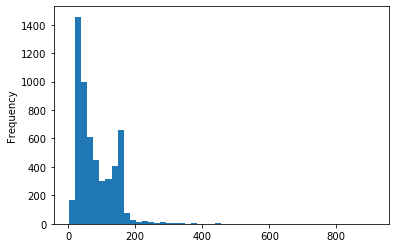

In [19]:
messages['length'].plot.hist(bins=50)

In [20]:
messages.xs(messages['length'].argmax())['message']

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBF0B72E48>,
      dtype=object)

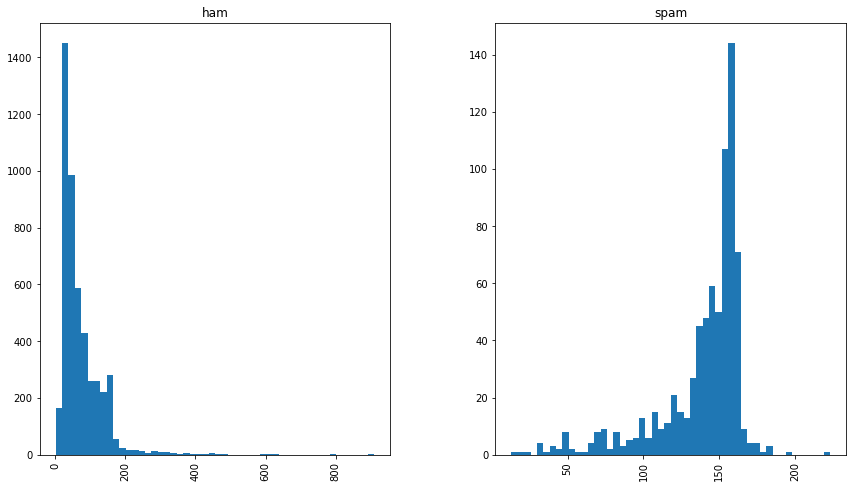

In [21]:
messages.hist(column='length',by='label',bins=50,figsize=(14,8))

In [22]:
import string

In [23]:
mess = 'Sample mesage! Notice that, it has punctuation.'


In [24]:
nopunc = [c for c in mess if c not in string.punctuation]

In [25]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [26]:
nopunc.join()

AttributeError: 'list' object has no attribute 'join'

In [27]:
from nltk.corpus import stopwords

In [28]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
nopunc  = ''.join(nopunc)

In [30]:
nopunc

'Sample mesage Notice that it has punctuation'

In [31]:
nopunc.split()

['Sample', 'mesage', 'Notice', 'that', 'it', 'has', 'punctuation']

In [32]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['Sample', 'mesage', 'Notice', 'punctuation']

In [37]:
def func(word):
    nopunc = [c for c in word if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.split()
    return [wor for wor in nopunc if wor not in stopwords.words('english')]







In [38]:
func('Sample mesage Notice that it has punctuation')

['Sample', 'mesage', 'Notice', 'punctuation']

In [41]:
messages['message'].head(5).apply(func)[0]

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
bow = CountVectorizer(analyzer=func).fit(messages['message'])

In [44]:
print(len(bow.vocabulary_))

11617


In [45]:
mess4 = messages['message'][3]

In [46]:
print(mess4)

U dun say so early hor... U c already then say...


In [47]:
bow4 = bow.transform([mess4])

In [49]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [50]:
bow4.shape

(1, 11617)

In [54]:
bow.get_feature_names()[4221]

'U'

In [55]:
bow.get_feature_names()[9746]

'say'

In [56]:
message_bow = bow.transform(messages['message'])

In [57]:
print('Shape of the sparse matrix: ',message_bow.shape)

Shape of the sparse matrix:  (5572, 11617)


In [61]:
message_bow.nnz

56024

In [63]:
sparsity = (100* (message_bow.nnz/(message_bow.shape[0]*message_bow.shape[1])))
print('sparsity : {}'.format(sparsity))

sparsity : 0.08655038742205227


In [64]:
from sklearn.feature_extraction.text import TfidfTransformer

In [65]:
tfidf  = TfidfTransformer().fit(message_bow)

In [66]:
tfidf4 = tfidf.transform(bow4)

In [67]:
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [71]:
tfidf.idf_[bow.vocabulary_['bonus']]

8.527076498901426

In [73]:
messages_tfidf = tfidf.transform(message_bow)

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [78]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [77]:
messages['label'][3]

'ham'

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3,random_state=101)

In [81]:
msg_train

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
                              ...                        
4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
599     Will do. Was exhausted on train this morning. ...
1361    Yo dude guess who just got arrested the other day
1547                Shant disturb u anymore... Jia you...
4959                     Why didn't u call on your lunch?
Name: message, Length: 3900, dtype: object

In [83]:
bow = CountVectorizer(analyzer=func).fit(msg_train)

In [84]:
print(len(bow.vocabulary_))

9536


In [85]:
message_bow = bow.transform(msg_train)

In [89]:
print(message_bow[0])

  (0, 915)	1
  (0, 3806)	1
  (0, 5826)	1
  (0, 6731)	1
  (0, 6910)	1
  (0, 7590)	1


In [90]:
message_bow.shape

(3900, 9536)

In [91]:
message_bow.nnz

39716

In [101]:
sparsity = (100* (message_bow.nnz/(message_bow.shape[0]*message_bow.shape[1])))
print('sparsity : {}'.format(sparsity))

sparsity : 0.10679099982791257


In [103]:
tfidf = TfidfTransformer().fit(message_bow)

In [104]:
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [105]:
tfidf.idf_[bow.vocabulary_['deal']]

7.323078060451343

In [106]:
message_tfidf = tfidf.transform(message_bow)

In [110]:
spam_detect_model= MultinomialNB().fit(message_tfidf,label_train)

In [114]:
test_message = bow.transform(msg_test)

In [115]:
test_tfidf = tfidf.transform(test_message)

In [121]:
spam_detect_model.predict(test_tfidf)

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [144]:
result = pd.DataFrame([spam_detect_model.predict(test_tfidf),label_test]).transpose()

In [146]:
result.columns=[['Detected','Actual']]

In [158]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   (Detected,)  1672 non-null   object
 1   (Actual,)    1672 non-null   object
dtypes: object(2)
memory usage: 26.2+ KB


In [117]:
label_test

2373     ham
1942    spam
54      spam
1900     ham
1564     ham
        ... 
790      ham
3982     ham
823     spam
1911     ham
1237     ham
Name: label, Length: 1672, dtype: object

In [163]:
result.describe()

,Detected,Actual
count,1672,1672
unique,2,2
top,ham,ham
freq,1544,1475


In [166]:
result

,Detected,Actual
0,ham,ham
1,spam,spam
2,ham,spam
3,ham,ham
4,ham,ham
...,...,...
1667,ham,ham
1668,ham,ham
1669,spam,spam
1670,ham,ham


In [170]:
result.columns

MultiIndex([('Detected',),
            (  'Actual',)],
           )